In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/home/activator/Desktop/PLP/week8python_Project/owid-covid-data.csv')

# Explore



/usr/lib/python3/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344779 entries, 0 to 344778
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    344779 non-null  object 
 1   continent                                   328403 non-null  object 
 2   location                                    344779 non-null  object 
 3   date                                        344779 non-null  object 
 4   total_cases                                 306964 non-null  float64
 5   new_cases                                   335338 non-null  float64
 6   new_cases_smoothed                          334079 non-null  float64
 7   total_deaths                                285503 non-null  float64
 8   new_deaths                                  335378 non-null  float64
 9   new_deaths_smoothed                         334148 non-null  float64
 

In [5]:
df.isnull().sum().sort_values(ascending=False)

weekly_icu_admissions                      334669
weekly_icu_admissions_per_million          334669
excess_mortality_cumulative_per_million    332835
excess_mortality                           332835
excess_mortality_cumulative                332835
                                            ...  
new_deaths_per_million                       9401
population                                      0
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

### Data Cleaning

In [6]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter countries of interest
countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]

# Drop rows with missing critical data (if any)
df.dropna(subset=['total_cases', 'total_deaths'], inplace=True)

# Fill other missing values (e.g., forward fill)
df.fillna(method='ffill', inplace=True)


/tmp/ipykernel_93743/2961071263.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


### Exploratory Data Analysis (EDA)


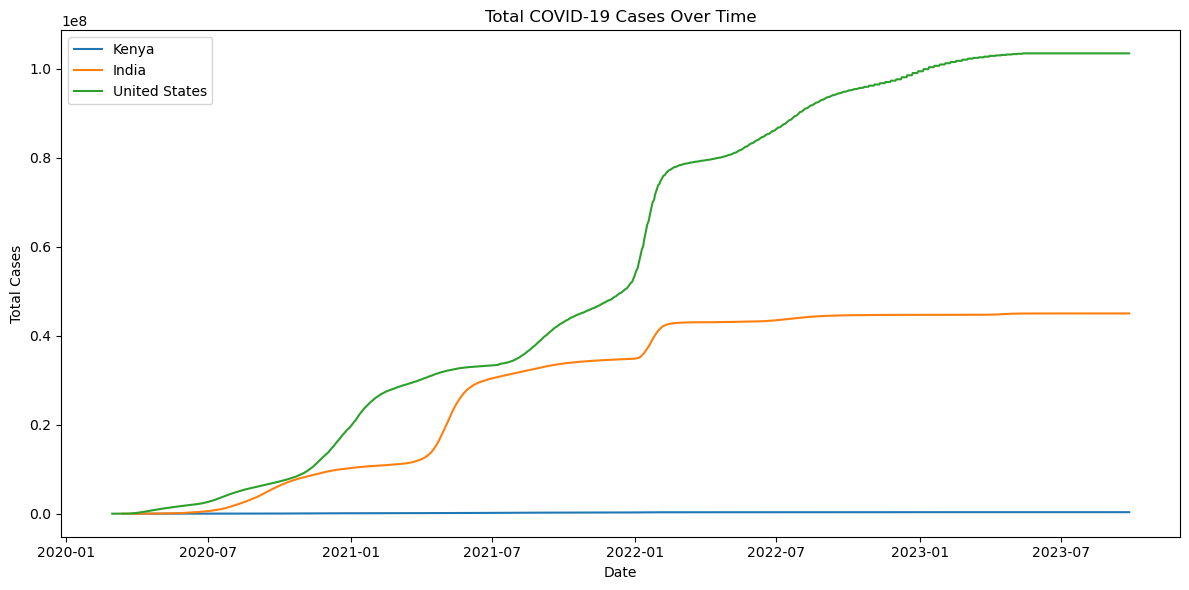

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


### Daily New Cases & Death Rates

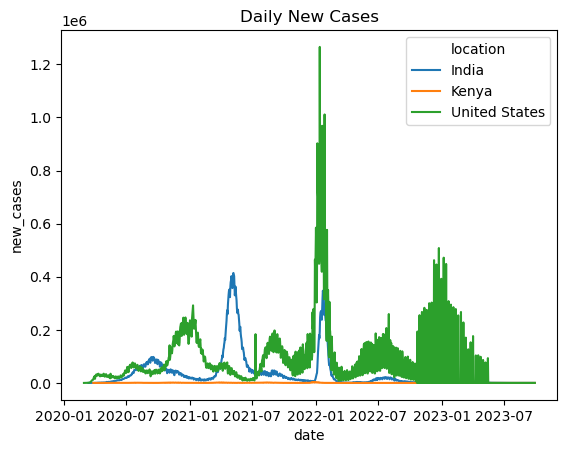

In [8]:
# New daily cases
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title("Daily New Cases")

# Death rate = total_deaths / total_cases
df['death_rate'] = df['total_deaths'] / df['total_cases']


### Vaccination Progress

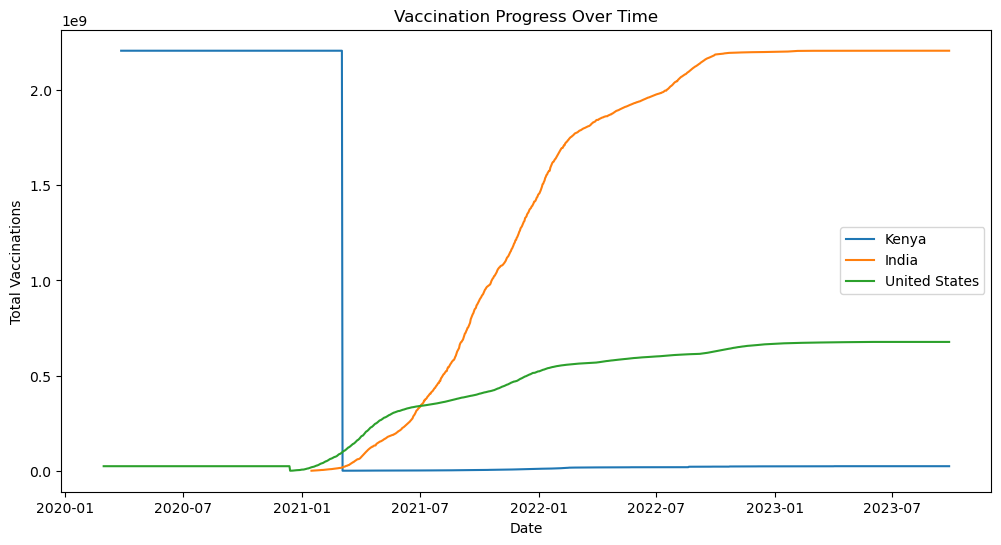

In [9]:
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title("Vaccination Progress Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()


### Choropleth Map Using Plotly

In [ ]:
import plotly.express as px

# Get latest data
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]

# Prepare dataframe
map_df = latest_df[['iso_code', 'location', 'total_cases', 'total_vaccinations']]

# Choropleth
fig = px.choropleth(
    map_df,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Viridis",
    title="COVID-19 Total Cases by Country"
)
fig.show()


In [12]:
insights = """
📊 INSIGHTS

1. The United States reported the highest total number of cases and deaths throughout the observed period.
2. India showed a sharp increase in vaccination coverage starting around May 2021, coinciding with efforts to curb the second wave.
3. Kenya maintained relatively lower case numbers but exhibited a consistent trend, possibly due to lower testing or population density differences.
4. Death rates varied significantly across countries, suggesting disparities in healthcare capacity, public health responses, and population demographics.
"""

conclusion = """
🧾 CONCLUSION

This analysis provided a multi-dimensional look at the global COVID-19 situation using data visualization techniques. By exploring confirmed cases, death rates, and vaccination progress across selected countries, we identified clear trends and anomalies:

- Countries with stronger healthcare systems and early vaccination rollouts were better equipped to manage outbreaks.
- Visualization helped expose patterns not easily seen in raw data, such as post-vaccine surges or regional differences in mortality.

Continued analysis of up-to-date data remains essential to guide future health policy and preparedness.
"""

print(insights)
print(conclusion)



📊 INSIGHTS

1. The United States reported the highest total number of cases and deaths throughout the observed period.
2. India showed a sharp increase in vaccination coverage starting around May 2021, coinciding with efforts to curb the second wave.
3. Kenya maintained relatively lower case numbers but exhibited a consistent trend, possibly due to lower testing or population density differences.
4. Death rates varied significantly across countries, suggesting disparities in healthcare capacity, public health responses, and population demographics.


🧾 CONCLUSION

This analysis provided a multi-dimensional look at the global COVID-19 situation using data visualization techniques. By exploring confirmed cases, death rates, and vaccination progress across selected countries, we identified clear trends and anomalies:

- Countries with stronger healthcare systems and early vaccination rollouts were better equipped to manage outbreaks.
- Visualization helped expose patterns not easily seen

In [ ]:
https://github.com/samrato/PLP/tree/main/week8python_Project